In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


Removing Name and ID

In [4]:
data = data.drop("S.No",axis=1)

In [5]:
data = data.drop(["EmpID","Emp Name"],axis=1)

Tenure is enough for now as it includes DOJ and End date

In [6]:
data = data.drop(["DOJ", "In Active Date"],axis=1)

Dropping attrition since all entries are 'Yes' and hence given dataset details only the people who have left their jobs.

In [7]:
data.head()

,Designation,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,Sales Executive,E1,Bhavnagar,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,Technical Services Officer,M2,Jayanagar,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,Sales Executive,E1,Indore,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,AM - Sales,M1,Admin Gujarat,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,Sales Executive,E1,Jagdishpuram,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


In [8]:
data.describe()

,Age,Last Rating,Monthly Income
count,327.000000,327.000000,327.000000
mean,28.541284,3.229358,32592.948012
std,5.048596,1.038814,15995.368859
min,24.000000,1.000000,25010.000000
25%,25.000000,2.000000,25704.500000
50%,27.000000,3.000000,26389.000000
75%,28.500000,4.000000,31916.000000
max,54.000000,5.000000,233954.000000


Since the mean age is 28 with SD 5 ,younger people are more prone to leaving jobs. Also the last rating is pretty high , 75% of the people having 4.

In [9]:
data.describe(include=['O'])

,Designation,Grade,Location,Tenure,Gender,Education,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
count,327,327,325,327,327,327,327,327,327,327
unique,10,7,140,73,2,2,98,3,9,10
top,Sales Executive,E1,Trivandrum,0. 0,Male,Bachelors,67%,Divorced,South,Issues with the Manager
freq,187,235,18,22,309,309,8,118,98,145


Most of the people leaving are Males with 94.5% being Males and also bachelors also constitute 94.5% of the people leaving

**Handling null values**

In [10]:
data.isnull().any()

Designation                          False
Grade                                False
Location                              True
Tenure                               False
Gender                               False
Education                            False
Age                                  False
Last Rating                          False
Monthly Income                       False
Engagement Score (% Satisfaction)    False
Marital Status                       False
Zone                                 False
Remarks                              False
dtype: bool

In [11]:
data.isnull().sum()

Designation                          0
Grade                                0
Location                             2
Tenure                               0
Gender                               0
Education                            0
Age                                  0
Last Rating                          0
Monthly Income                       0
Engagement Score (% Satisfaction)    0
Marital Status                       0
Zone                                 0
Remarks                              0
dtype: int64

Since only 2 are there

In [12]:
data.fillna(method='ffill',inplace=True)

**Verifying Null values.**

In [13]:
data['Location'].isnull().any()

False

In [14]:
data.isnull().any()

Designation                          False
Grade                                False
Location                             False
Tenure                               False
Gender                               False
Education                            False
Age                                  False
Last Rating                          False
Monthly Income                       False
Engagement Score (% Satisfaction)    False
Marital Status                       False
Zone                                 False
Remarks                              False
dtype: bool

**Visualizing column-wise**

In [15]:
data.groupby('Designation').mean()

,Age,Last Rating,Monthly Income
Designation,,,
Sales Executive,26.000000,3.625000,25776.500000
AM - Sales,34.454545,2.863636,52457.000000
National Sales Head,54.000000,3.000000,233954.000000
Regional Manager,36.600000,3.800000,56420.200000
Sales Executive,26.037433,3.283422,25978.112299
Sales Executive,25.925000,3.075000,26088.100000
Sr Sales Executive,30.391304,3.260870,34459.000000
Sr Sales Executive,30.545455,3.000000,34001.636364
Technical Services Officer,39.333333,3.259259,54154.518519


In [16]:
data.groupby('Grade').sum()

,Age,Last Rating,Monthly Income
Grade,,,
CXO,54,3,233954
E1,6114,766,6107643
E2,1035,108,1166575
M1,758,63,1154054
M2,1062,88,1462172
M3,183,19,282101
M4,127,9,251395


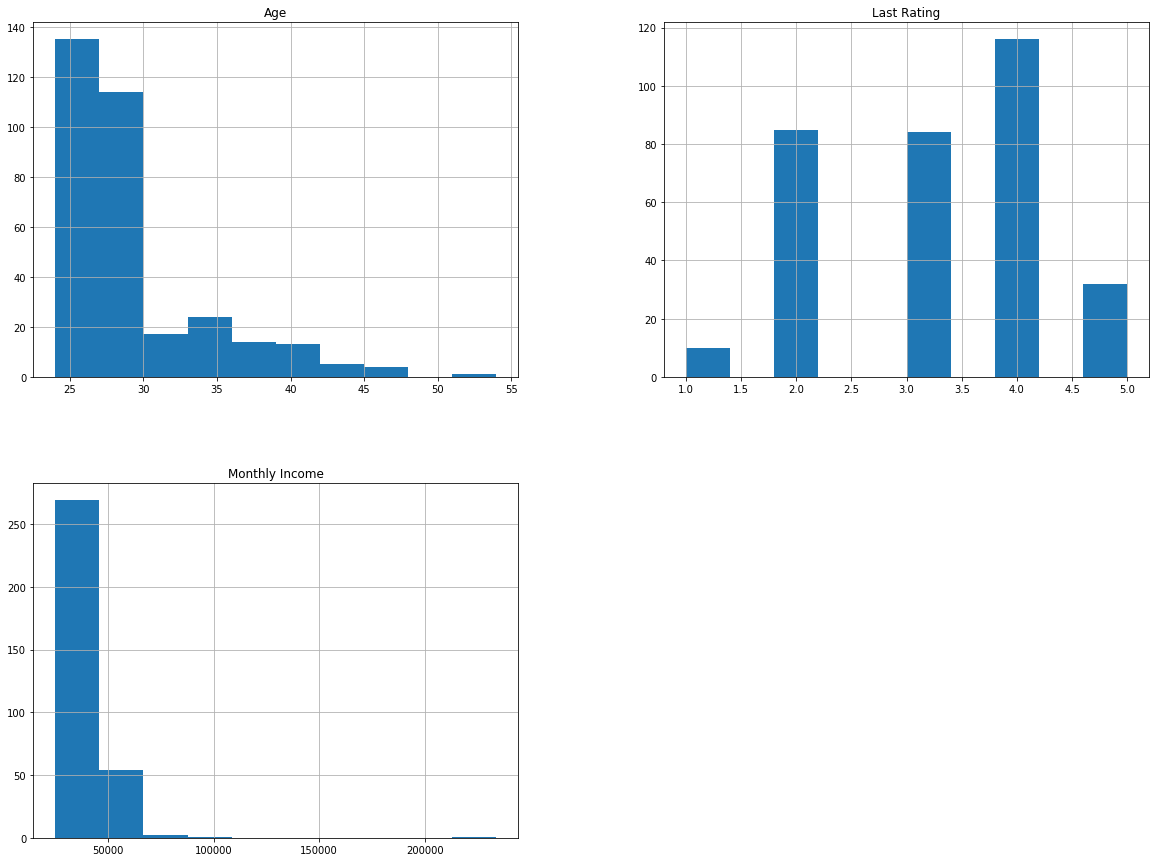

In [17]:
import matplotlib.pyplot as plt
num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.show()

Insight that People within 24-30 years, People with monthly income around 50,000 are more prone to leave jobs.

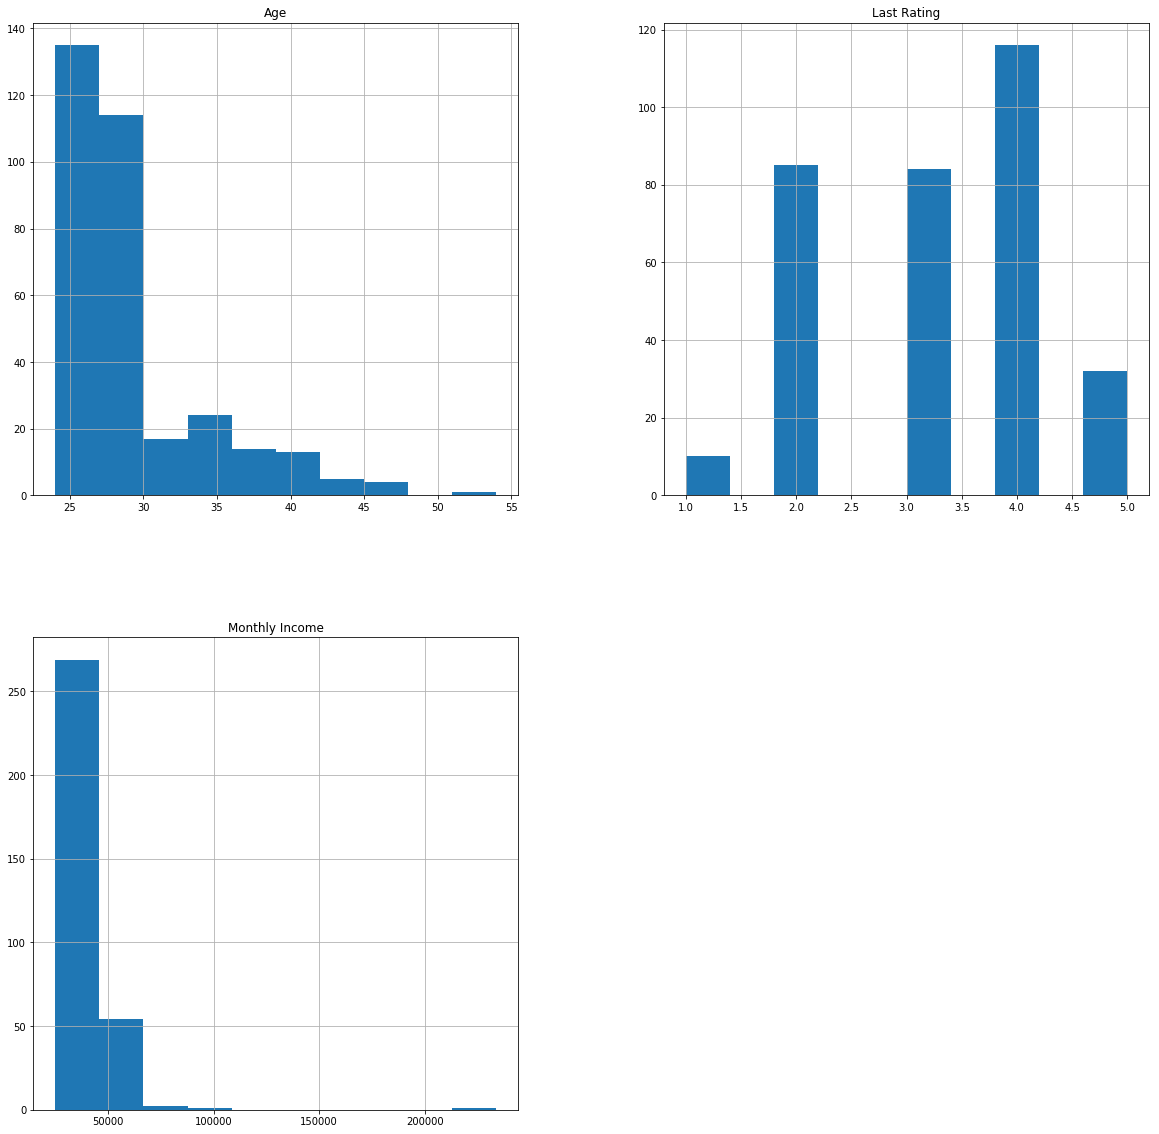

In [18]:
data.hist(figsize=(20,20))
plt.show()

In [19]:
data['Designation'].value_counts()

Sales Executive               187
Sales Executive                40
Technical Services Officer     27
Sr Sales Executive             23
AM - Sales                     22
Sr Sales Executive             11
 Sales Executive                8
Regional Manager                5
Zonal Manager                   3
National Sales Head             1
Name: Designation, dtype: int64

Highest Number of leavers were Sales Executive

In [20]:
data.head()

,Designation,Grade,Location,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,Sales Executive,E1,Bhavnagar,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,Technical Services Officer,M2,Jayanagar,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,Sales Executive,E1,Indore,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,AM - Sales,M1,Admin Gujarat,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,Sales Executive,E1,Jagdishpuram,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager


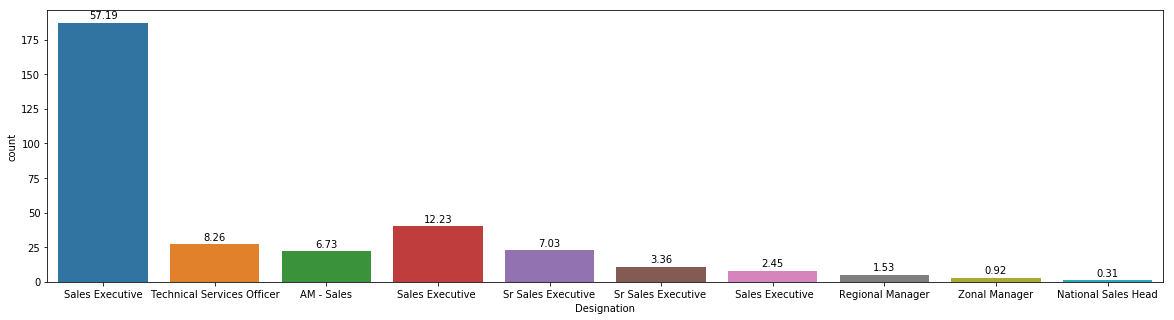

In [21]:
total = data.shape[0]
fig, ax = plt.subplots(figsize=(20,5))
fig = sns.countplot(x='Designation',data=data,ax=ax)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height*100/total),
            ha="center") 
plt.show()


Most number of employees leaving are Sales Executives

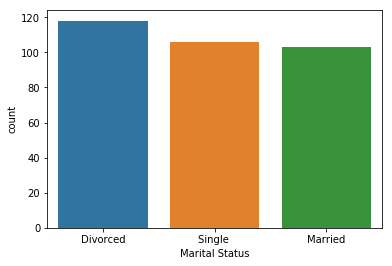

In [22]:
sns.countplot(x='Marital Status',data=data)
plt.show()

Marital status is not a major factor/ dependency factor

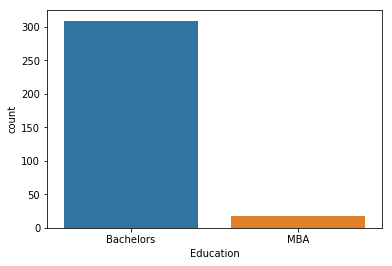

In [23]:
sns.countplot(x='Education',data=data)
plt.show()

Bachelor's are more prone to leaving

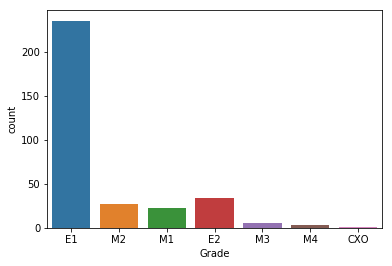

In [24]:
sns.countplot(x='Grade',data=data)
plt.show()

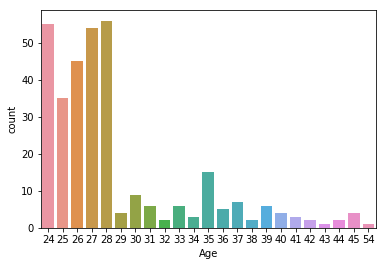

In [25]:
sns.countplot(x='Age',data=data)
plt.show()

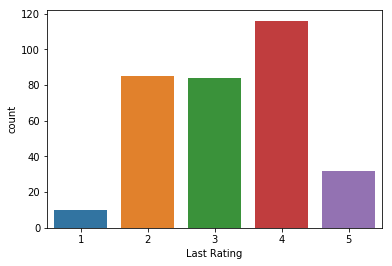

In [26]:
sns.countplot(x='Last Rating',data=data)
plt.show()

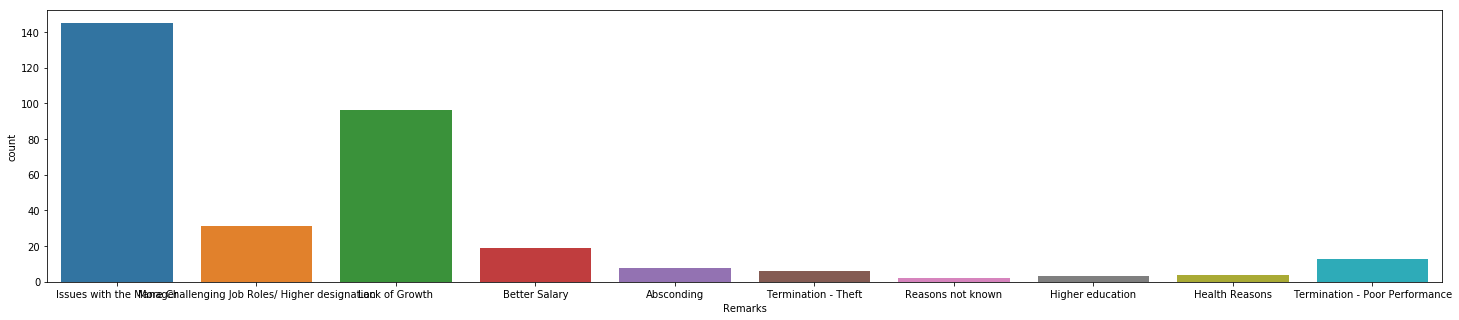

In [27]:
fig,ax = plt.subplots(figsize=(25,5))
sns.countplot(x='Remarks',data=data,ax=ax)
plt.show()

Issues with manager seems to be a common reason for Attrition

For tenure and engagement ratio, we need to group for some range and then plot.

In [28]:
data['Engagement Score (% Satisfaction)'].describe()

count     327
unique     98
top       67%
freq        8
Name: Engagement Score (% Satisfaction), dtype: object

In [29]:
data['Engagement Score (% Satisfaction)']

0       2%
1      45%
2      18%
3      82%
4      49%
      ... 
322    69%
323    11%
324    11%
325    82%
326    49%
Name: Engagement Score (% Satisfaction), Length: 327, dtype: object

In [30]:
data['Engagement Score (% Satisfaction)']=data['Engagement Score (% Satisfaction)'].str[:-1]

In [31]:
data['Engagement Score (% Satisfaction)']=data['Engagement Score (% Satisfaction)'].astype('int64')

In [32]:
data.loc[ data['Engagement Score (% Satisfaction)'] <= 20, 'Engagement Score (% Satisfaction)'] = 0
data.loc[(data['Engagement Score (% Satisfaction)'] > 20) & (data['Engagement Score (% Satisfaction)'] <= 40), 'Engagement Score (% Satisfaction)'] = 1
data.loc[(data['Engagement Score (% Satisfaction)'] > 40) & (data['Engagement Score (% Satisfaction)'] <= 60), 'Engagement Score (% Satisfaction)'] = 2
data.loc[(data['Engagement Score (% Satisfaction)'] > 60) & (data['Engagement Score (% Satisfaction)'] <= 80), 'Engagement Score (% Satisfaction)'] = 3
data.loc[(data['Engagement Score (% Satisfaction)'] > 80) & (data['Engagement Score (% Satisfaction)'] <= 100), 'Engagement Score (% Satisfaction)'] = 4



In [33]:
data['Engagement Score (% Satisfaction)']

0      0
1      2
2      0
3      4
4      2
      ..
322    3
323    0
324    0
325    4
326    2
Name: Engagement Score (% Satisfaction), Length: 327, dtype: int64

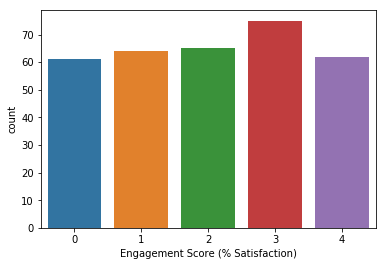

In [34]:
import matplotlib.pyplot as plt
sns.countplot(x='Engagement Score (% Satisfaction)',data=data)
plt.show()

Conclusions :


**1.** Younger people with age from 20-30 are more prone to leaving their jobs. Peak at around 27,28.

**2.** Last rating is pretty high for all people so that does not provide any insight.

**3.** Males and bachelors are prone to leave  in large numbers.

**4.** People with grade of E1 and E2, sales executives and with income of around 50000 are more prone to leaving the jobs.

**5.** Maritial status is not a major factor.

**6.** Issues with manager seems to be major reason for attrition.

**7.** Most of the people have high engagement ratio and so it did not provide any additional/major insight.

